In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from IPython import display

In [2]:
mpl.style.use('ggplot')

In [3]:
def f(x):
    return np.sin(2.0 * np.pi * x)

In [9]:
np.random.seed(9)
m = 50
x_plot = np.linspace(0, 1, m)
X = np.random.uniform(0, 1, size=m)[:, np.newaxis] 
y = f(X) + np.random.normal(scale=0.3, size=m)[:, np.newaxis]

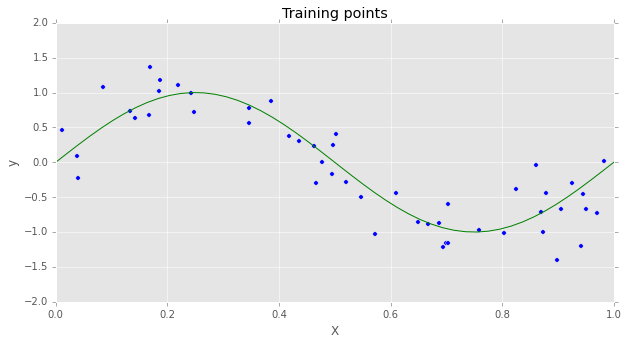

In [10]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ax.plot(x_plot, f(x_plot), 'g')
ax.set_xlim(0,1)
ax.set_ylim(-2,2)
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('Training points')
ax.scatter(X, y)

In [24]:
def plot_approximation(xplot, X, y, clf, ax, llabel=None, show_test=0):
    '''Plot the approximation of clf on axis ax'''
    
    ax.plot(x_plot, f(x_plot), 'g')
    ax.scatter(X, y, color='b')
    ax.plot(x_plot, clf.predict(x_plot[:, np.newaxis]), 'r', label=llabel)
    ax.set_ylabel('y')
    ax.set_xlabel('X')
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.legend(loc='upper right')
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
    
def plot_coefficients(clf, ax, llabel=None):
    coef = clf.steps[-1][1].coef_.ravel()
    ax.set_yscale('Log')
    ax.set_ylim((1e-1, 1e8))
    ax.set_ylabel('Absolute Value Coefficient (Log))')
    ax.set_xlabel('Coefficient Number')
    ax.set_xlim((1, 10))
    ax.plot(np.abs(coef), marker='o', label=llabel)

##The problem of over-fitting

###If there are too many features then the hypothesis function will fit the training set extremely well, but fail to 'generalize' to new examples

##Size of the model - meaning the number and complexity of the features determines the model fit
##Model Fit:
## 1. Under-fit. The model is too simple and cannot fit the training data. Poor generalization. Called "Bias"
## 2. Over-fit. The model is overly complex and fits the training data extremely well. Poor generalization. "High Variance"

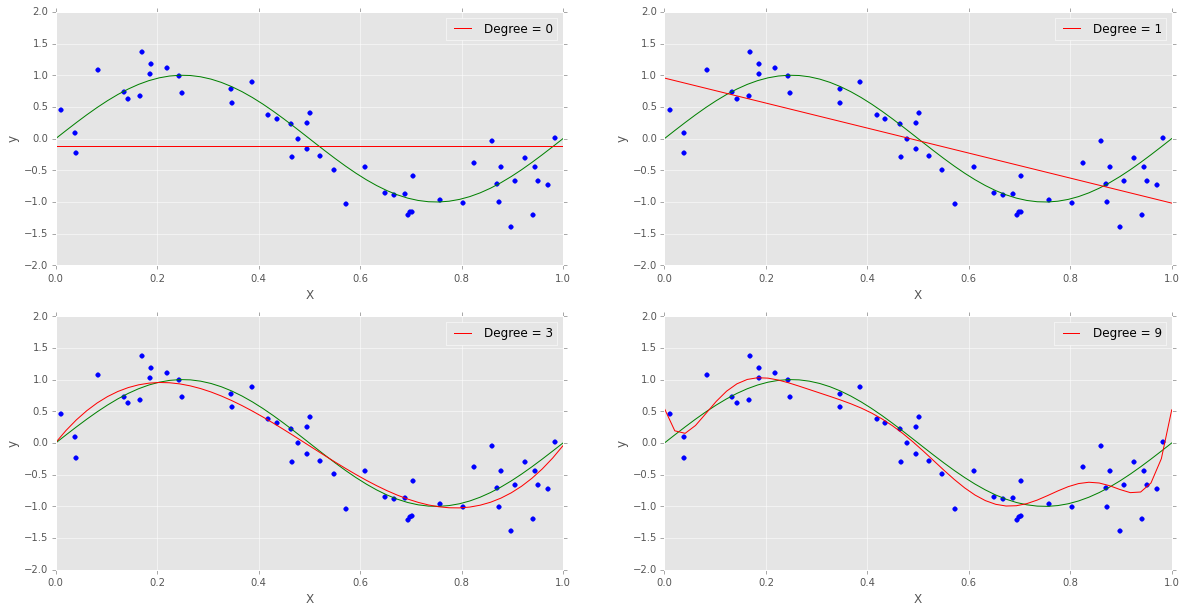

In [12]:
fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)
axes = [ax1, ax2, ax3, ax4]

clf_list = []

for axis, degree in enumerate([0, 1, 3, 9]):
    clf = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    clf_list.append(clf)
    clf.fit(X, y)
    plot_approximation(x_plot, X, y, clf, axes[axis],\
                       llabel = "Degree = {:d}".format(degree), show_test=0)

#Addressing the over-fitting problem
## * Plot the hypothesis
###     - usually of limited value because we usually have a lot of features
## * Reduce the number of features
###     - manually select which features to keep
###     - model selection algorithms - automatically decide which features to keep and which to throw out
###     - But maybe all of the features are useful. Throwing away features may not be a good idea
## * Regularization
###     - Keep all of the features, but reduce the magnitudes of the parameters of the model ($\theta$s)
###     - Works well when we have a lot of features, all of which might contribute a little towards predicting $y$

#Generalization

##This time we take 100 points for our training data
##The training data is split into 2 subsets - training set, and the test set
##The model complexity or size is increased
##The model is fitted to the training set
##The Mean Squared Error is measured for the model predictions on the training set and the test set
##Note that as the complexity or size of the model increases the MSE on the training set continues to fall
##BUT the MSE on the test set reaches a minimum and then rises again. The model is failing to work well on unseen data as it becomes overly complex

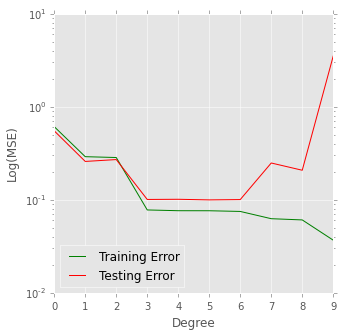

In [15]:
np.random.seed(9)
m = 100
#x_plot = np.linspace(0, 1, m)
X = np.random.uniform(0, 1, size=m)[:, np.newaxis] 
y = f(X) + np.random.normal(scale=0.3, size=m)[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

max_degree = 10
training_error = np.zeros(max_degree)
testing_error = np.zeros(max_degree)

for degree in xrange(max_degree):
    clf = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    clf.fit(X_train, y_train)
    training_error[degree] = mean_squared_error(y_train, clf.predict(X_train))
    testing_error[degree] = mean_squared_error(y_test, clf.predict(X_test))


fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.plot(np.arange(10), training_error, 'g', label='Training Error')
ax.plot(np.arange(10), testing_error, 'r', label='Testing Error')
ax.set_yscale('Log')
ax.set_xlabel('Degree')
ax.set_ylabel('Log(MSE)')
ax.legend(loc='lower left')

##Look what happens to the model parameters when over-fitting occurs

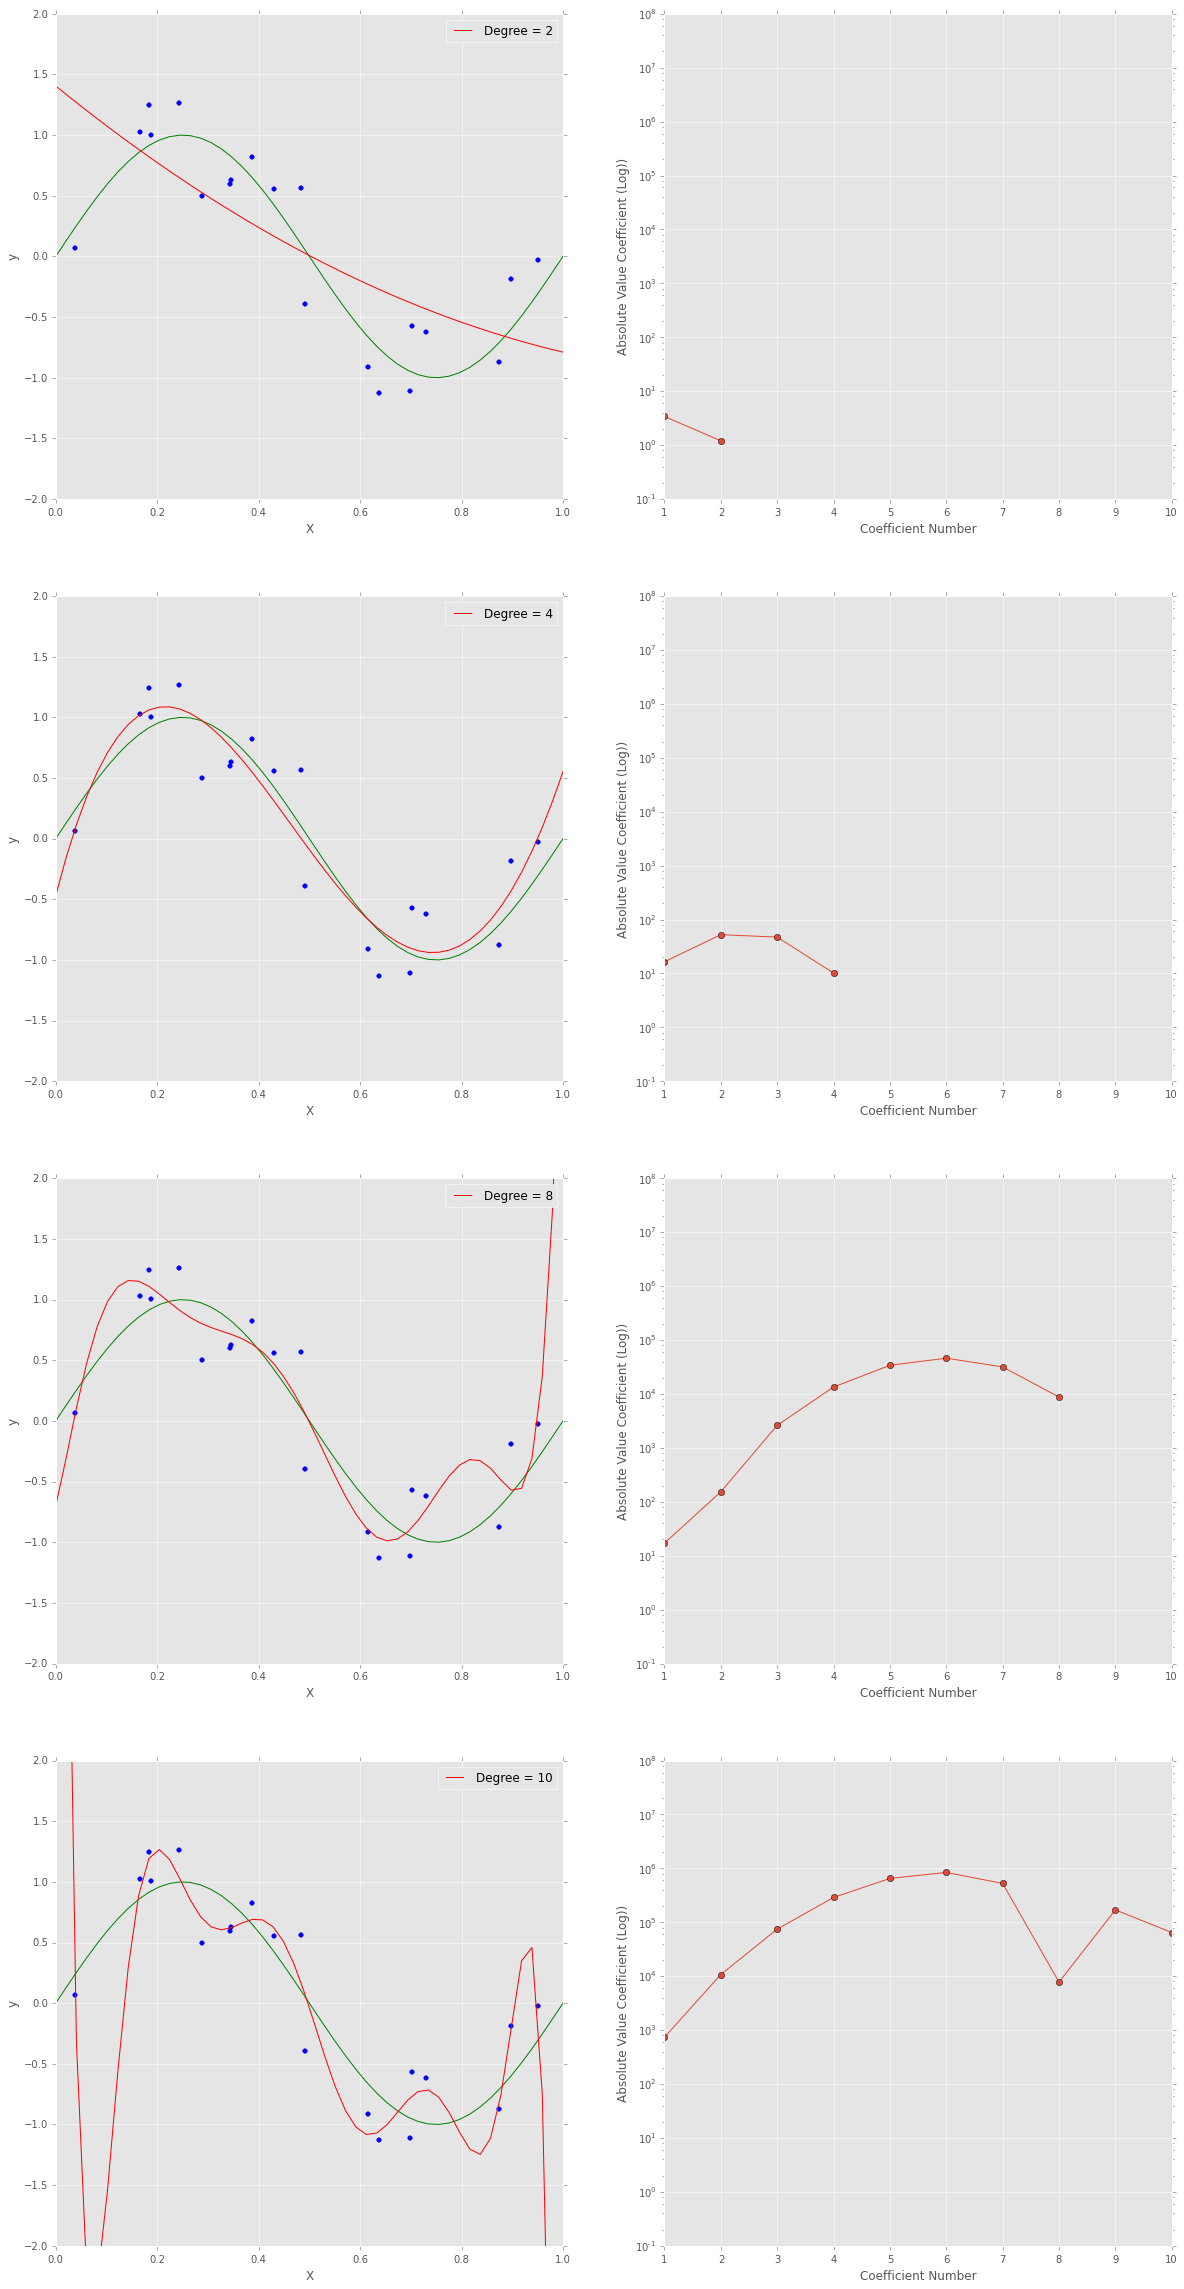

In [25]:
fig = plt.figure(figsize=(20,40))
ax1 = plt.subplot(421)
ax2 = plt.subplot(422)
ax3 = plt.subplot(423)
ax4 = plt.subplot(424)
ax5 = plt.subplot(425)
ax6 = plt.subplot(426)
ax7 = plt.subplot(427)
ax8 = plt.subplot(428)
axes = [[ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8]]
alphas = [0.0, 1e-8, 1e-5, 1e-1]

degree=2
for i, degree in enumerate([2, 4, 8, 10]):
    left_axes = axes[i][0]
    right_axes = axes[i][1]
    clf = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    clf.fit(X_train, y_train)
    plot_approximation(x_plot, X_train, y_train, clf, left_axes, llabel = "Degree = {:d}".format(degree))
    plot_coefficients(clf, right_axes, llabel=None)

#Regularization
##What would happen if we were to add to our sum of squares cost function the following terms?
## $$J(\theta)=\frac{1.0}{2m}\left[\sum_{i=1}^{m}(y_{i}-\hat{y}_{i})^2 + 1000 * \theta_{3} + 1000 * \theta_{4}\right]$$
##In addition to minimizing the sum of squares term, $\theta_{3}$ and $\theta_{4}$ would both be driven towards $0$
##More generally: $$J(\theta)=\frac{1.0}{2m}\left[\sum_{i=1}^{m}(y_{i}-\hat{y}_{i})^2 + \lambda\sum_{j}^{N}\theta_{j}\right]$$
##By adding an extra term that penalizes large model parameters results in models with small parameter values
#Intuition
##Small parameter values:
###Produce a 'less complex' hypothesis function - 'smoother'
###Produce a linear model that is less prone to over-fitting
###One approach is to shrink all the parameters - all the $\theta$s, using a single regularization parameter $\lambda$
###$$J(\theta)=\frac{1.0}{2m}\left[\sum_{i=1}^{m}(y_{i}-\hat{y}_{i})^2 + \lambda\sum_{j}^{N}\theta_{j}\right]$$
###If $\lambda$ is set too high you will under-fit (again)!! - horizontal straight line

#Types of regularization
##There are different types of regularization terms available
## 1. Ridge (Tikhonov regularization) = L2-norm = Euclidean norm of the sum of the parameters, $\theta$, of the model $= \lambda||\theta||^{2}$
###As the penalty is increased ALL parameters shrink, while still remaining non-zero

## 2. Lasso (Least Absolute Shrinkage and Selection Operator) = L1-norm $= \lambda||\theta||$
###As the penalty is increased MORE of the parameters will shrink to zero
###This can discard features

## 3. Elastic Net. A linear combination of Ridge and Lasso

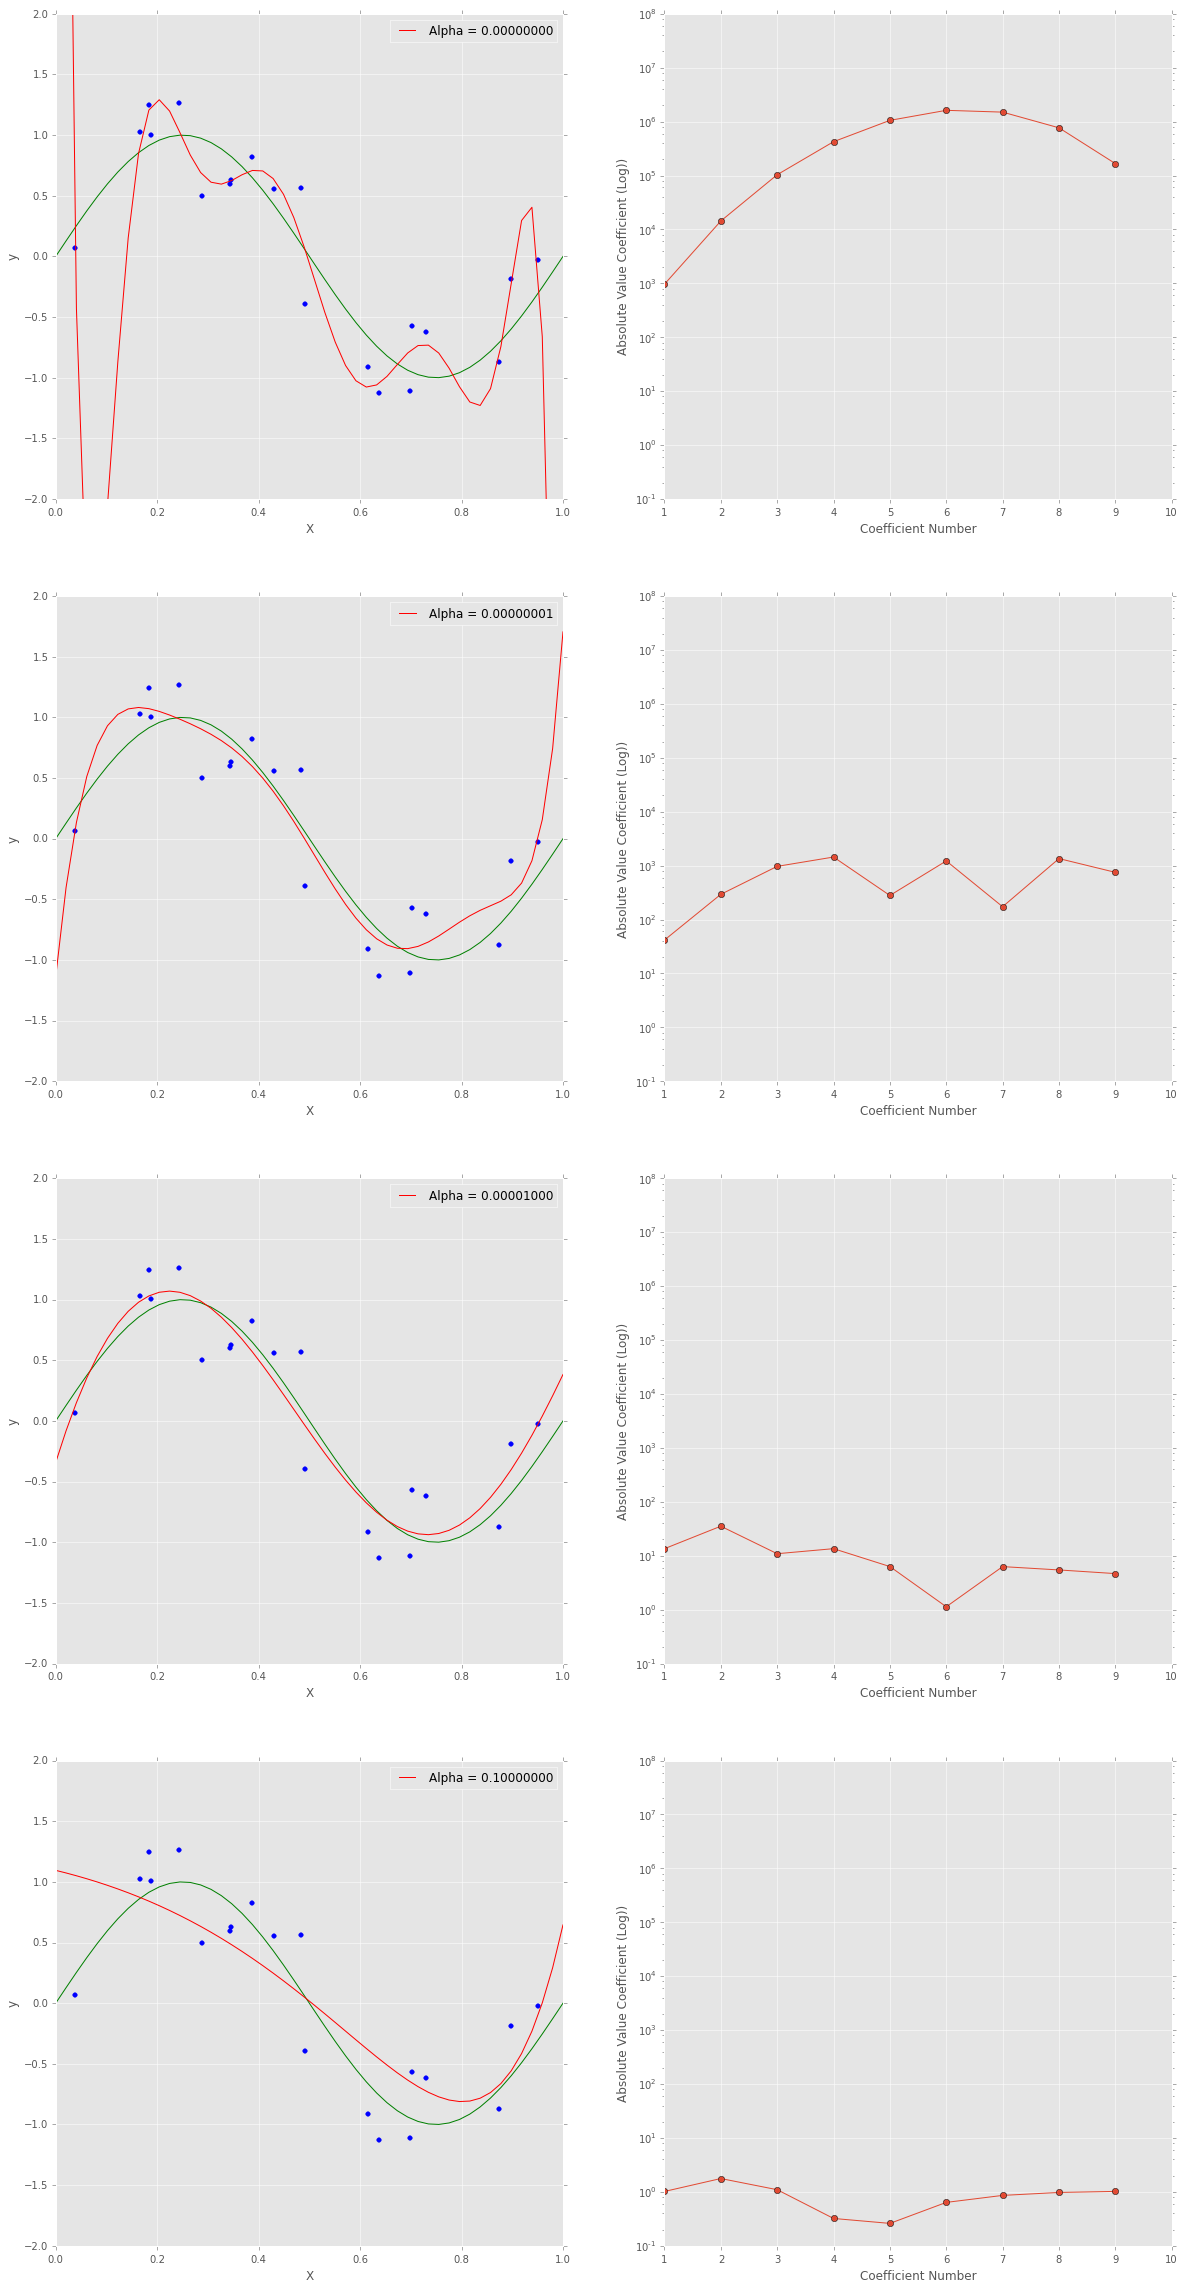

In [28]:
fig = plt.figure(figsize=(20,40))
ax1 = plt.subplot(421)
ax2 = plt.subplot(422)
ax3 = plt.subplot(423)
ax4 = plt.subplot(424)
ax5 = plt.subplot(425)
ax6 = plt.subplot(426)
ax7 = plt.subplot(427)
ax8 = plt.subplot(428)
axes = [[ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8]]
alphas = [0.0, 1e-8, 1e-5, 1e-1]
degree=9

for axis, aalpha in enumerate(alphas):
    left_axes = axes[axis][0]
    right_axes = axes[axis][1]
    clf = make_pipeline(PolynomialFeatures(degree), Ridge(alpha = aalpha))
    clf.fit(X_train, y_train)
    plot_approximation(x_plot, X_train, y_train, clf, \
                       left_axes, llabel = "Alpha = {:0.8f}".format(aalpha))
    plot_coefficients(clf, right_axes, llabel=None)

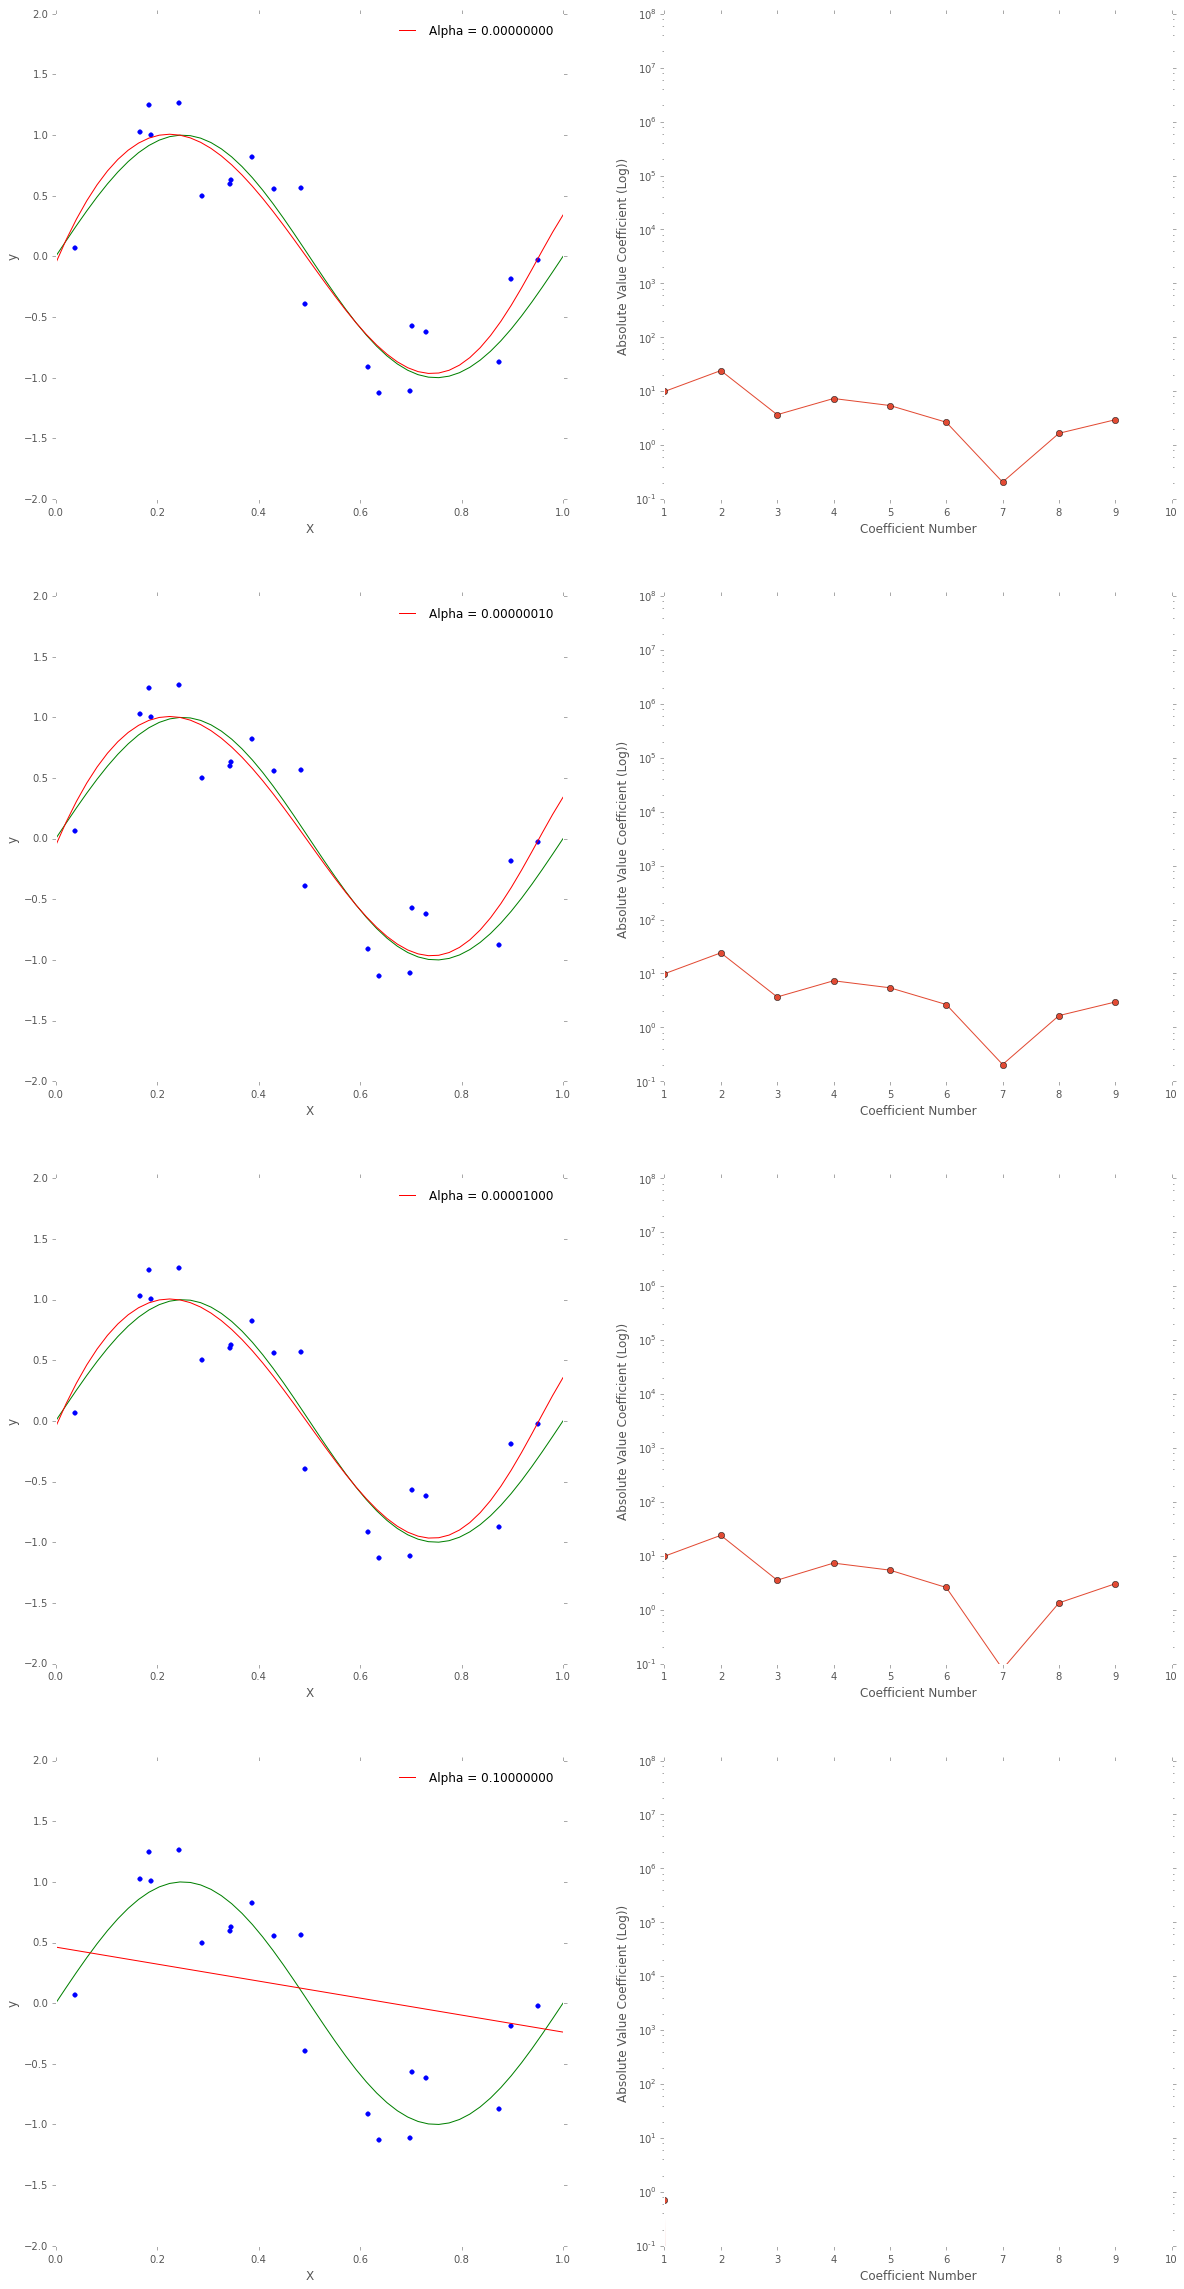

In [32]:
fig = plt.figure(figsize=(20,40))
ax1 = plt.subplot(421)
ax2 = plt.subplot(422)
ax3 = plt.subplot(423)
ax4 = plt.subplot(424)
ax5 = plt.subplot(425)
ax6 = plt.subplot(426)
ax7 = plt.subplot(427)
ax8 = plt.subplot(428)
axes = [[ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8]]
alphas = [1e-9, 1e-7, 1e-5, 1e-1]
degree=9

for axis, aalpha in enumerate(alphas):
    left_axes = axes[axis][0]
    right_axes = axes[axis][1]
    clf = make_pipeline(PolynomialFeatures(degree), Lasso(alpha = aalpha))
    clf.fit(X_train, y_train)
    plot_approximation(x_plot, X_train, y_train, clf, \
                       left_axes, llabel = "Alpha = {:0.8f}".format(aalpha))
    plot_coefficients(clf, right_axes, llabel=None)

##Want to be able to demonstrate bias and variance, aka under- and over-fitting

#Regularized Linear Regression (gradient descent and linear equations)
 * In gradient descent the addition of the regularization term shrinks the parameters on each iteration
 * In the normal equations a similar thing happens in the math
 * In normal equations need more examples than features (otherwise there will be matrix degeneracy (singular, or non invertible)) - regularization will cure this problem too

##Regularized Logistic Regression
 * Again add $\lambda$ term to the cost function
 * Regularized high order polynomial will give a better decision boundary